In [3]:
import csv 
import pandas as pd
import nltk
import os
import warnings
warnings.filterwarnings('ignore')

Now we want to preprocess the tweets accordingly to their languages.

In [4]:
#define the languages we want to preprocess
lang_list = ['en', 'es', 'pt']

# define what each iso-639 code means
lang_dict = {
    'en': 'english',
    'es': 'spanish',
    'pt': 'portugese'
}

clean_data_dir = './clean_data'
joblib_dir = './joblib'
csv_dir = './processed_csv'
lang = 'en'

We will preprocess English first. Let's import the csv file into a Pandas DataFrame

In [5]:
fulldir = os.path.join(clean_data_dir, lang + '.csv')   

df_eng = pd.read_csv(fulldir)
df_eng

,Unnamed: 0,Tweet,clean_tweets,prediction,language,confidence
0,3,I felt my first flash of violence at some fool...,I felt my first flash of violence at some fool...,"('en', 0.9772645831108093)",en,0.977265
1,4,Ladies drink and get in free till 10:30,Ladies drink and get in free till,"('en', 0.6527988910675049)",en,0.652799
2,7,Watching #Miranda On bbc1!!! @mermhart u r HIL...,Watching Miranda On bbc mermhart u r HILARIOUS,"('en', 0.5819909572601318)",en,0.581991
3,9,Shopping! (@ Kohl's) http://t.co/I8ZkQHT9,Shopping Kohls httptcoIZkQHT,"('en', 0.5320528745651245)",en,0.532053
4,16,@Dennycrowe all over twitter because you and y...,Dennycrowe all over twitter because you and yo...,"('en', 0.768022358417511)",en,0.768022
...,...,...,...,...,...,...
4307,10492,Another Cardigan Records Hopscotch Day Party i...,Another Cardigan Records Hopscotch Day Party i...,"('en', 0.920673131942749)",en,0.920673
4308,10493,"I'm at Hempstead Hair World in Elmont, NY http...",Im at Hempstead Hair World in Elmont NY httpst...,"('en', 0.5241799354553223)",en,0.524180
4309,10494,Bachelorette 💍💞 @ Laurita Winery https://t.co/...,Bachelorette Laurita Winery httpstcoBsIIFmdGz,"('en', 0.6609522104263306)",en,0.660952
4310,10496,This #job might be a great fit for you: Sr. In...,This job might be a great fit for you Sr Infor...,"('en', 0.6981475949287415)",en,0.698148


Since we just want the `clean_tweets` we can just omit other columns.

In [6]:
df_eng_clean_tweets = df_eng[['Tweet', 'clean_tweets']]
df_eng_clean_tweets

,Tweet,clean_tweets
0,I felt my first flash of violence at some fool...,I felt my first flash of violence at some fool...
1,Ladies drink and get in free till 10:30,Ladies drink and get in free till
2,Watching #Miranda On bbc1!!! @mermhart u r HIL...,Watching Miranda On bbc mermhart u r HILARIOUS
3,Shopping! (@ Kohl's) http://t.co/I8ZkQHT9,Shopping Kohls httptcoIZkQHT
4,@Dennycrowe all over twitter because you and y...,Dennycrowe all over twitter because you and yo...
...,...,...
4307,Another Cardigan Records Hopscotch Day Party i...,Another Cardigan Records Hopscotch Day Party i...
4308,"I'm at Hempstead Hair World in Elmont, NY http...",Im at Hempstead Hair World in Elmont NY httpst...
4309,Bachelorette 💍💞 @ Laurita Winery https://t.co/...,Bachelorette Laurita Winery httpstcoBsIIFmdGz
4310,This #job might be a great fit for you: Sr. In...,This job might be a great fit for you Sr Infor...


Firstly, we want to lowercase everything.

In [8]:
df_eng_clean_tweets['lowercase'] = df_eng_clean_tweets['clean_tweets'].apply(lambda x: x.lower())
df_eng_clean_tweets

,Tweet,clean_tweets,lowercase
0,I felt my first flash of violence at some fool...,I felt my first flash of violence at some fool...,i felt my first flash of violence at some fool...
1,Ladies drink and get in free till 10:30,Ladies drink and get in free till,ladies drink and get in free till
2,Watching #Miranda On bbc1!!! @mermhart u r HIL...,Watching Miranda On bbc mermhart u r HILARIOUS,watching miranda on bbc mermhart u r hilarious
3,Shopping! (@ Kohl's) http://t.co/I8ZkQHT9,Shopping Kohls httptcoIZkQHT,shopping kohls httptcoizkqht
4,@Dennycrowe all over twitter because you and y...,Dennycrowe all over twitter because you and yo...,dennycrowe all over twitter because you and yo...
...,...,...,...
4307,Another Cardigan Records Hopscotch Day Party i...,Another Cardigan Records Hopscotch Day Party i...,another cardigan records hopscotch day party i...
4308,"I'm at Hempstead Hair World in Elmont, NY http...",Im at Hempstead Hair World in Elmont NY httpst...,im at hempstead hair world in elmont ny httpst...
4309,Bachelorette 💍💞 @ Laurita Winery https://t.co/...,Bachelorette Laurita Winery httpstcoBsIIFmdGz,bachelorette laurita winery httpstcobsiifmdgz
4310,This #job might be a great fit for you: Sr. In...,This job might be a great fit for you Sr Infor...,this job might be a great fit for you sr infor...


In [9]:
!pip install wordcloud

     |████████████████████████████████| 371 kB 1.9 MB/s 
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


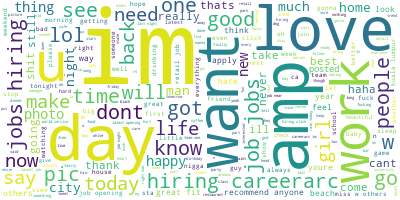

In [10]:
# Import the wordcloud library
from wordcloud import WordCloud
# Join the different processed titles together.
long_string = ','.join(list(df_eng_clean_tweets['lowercase'].values))
# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')
# Generate a word cloud
wordcloud.generate(long_string)
# Visualize the word cloud
wordcloud.to_image()

A simple wordcloud to visualize which words are more common. The big im tells us that it is a stop words since it does not really have meanings, some words like cant, lol are not very useful either. We would want to add them in the stopwords.

Then we remove the stopwords.

In [9]:
nltk.download('stopwords')
from nltk.corpus import stopwords

stop_words = stopwords.words(lang_dict[lang])
stop_words.append('cant')
stop_words.append('im')
stop_words.append('lol')


df_eng_clean_tweets['stopwords_removed'] = df_eng_clean_tweets['lowercase'].apply(lambda x: ' '.join([item for item in x.split() if item not in stop_words]))
df_eng_clean_tweets

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/bingyuyap/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,Tweet,clean_tweets,lowercase,stopwords_removed
0,I felt my first flash of violence at some fool...,I felt my first flash of violence at some fool...,i felt my first flash of violence at some fool...,felt first flash violence fool bumped pity fool
1,Ladies drink and get in free till 10:30,Ladies drink and get in free till,ladies drink and get in free till,ladies drink get free till
2,Watching #Miranda On bbc1!!! @mermhart u r HIL...,Watching Miranda On bbc mermhart u r HILARIOUS,watching miranda on bbc mermhart u r hilarious,watching miranda bbc mermhart u r hilarious
3,Shopping! (@ Kohl's) http://t.co/I8ZkQHT9,Shopping Kohls httptcoIZkQHT,shopping kohls httptcoizkqht,shopping kohls httptcoizkqht
4,@Dennycrowe all over twitter because you and y...,Dennycrowe all over twitter because you and yo...,dennycrowe all over twitter because you and yo...,dennycrowe twitter friends stick
...,...,...,...,...
4307,Another Cardigan Records Hopscotch Day Party i...,Another Cardigan Records Hopscotch Day Party i...,another cardigan records hopscotch day party i...,another cardigan records hopscotch day party b...
4308,"I'm at Hempstead Hair World in Elmont, NY http...",Im at Hempstead Hair World in Elmont NY httpst...,im at hempstead hair world in elmont ny httpst...,hempstead hair world elmont ny httpstcohvyghzyehc
4309,Bachelorette 💍💞 @ Laurita Winery https://t.co/...,Bachelorette Laurita Winery httpstcoBsIIFmdGz,bachelorette laurita winery httpstcobsiifmdgz,bachelorette laurita winery httpstcobsiifmdgz
4310,This #job might be a great fit for you: Sr. In...,This job might be a great fit for you Sr Infor...,this job might be a great fit for you sr infor...,job might great fit sr information architect s...


I will be using Lemmatizer instead of Stemmer because Stemmer could lead to mispelled words and this will cause duplicated tokens for a supposedly same word. However, I don't think this is scalable as we increase the scope of the languages as there might not be Lemmatizer / good Lemmatizers for specific languages. That introduces the need for language specific preprocessing.

Considerations:
1. Speed - while Lemmatizer is usually slower than Stemmer, it does a better job in getting the actual word / meaning of the tokens. So here is a tradeoff introduced.
2. Preprocess all the data source fairly - I want to create a pipeline to preprocess all languages the same way. For this assignment purpose, the SpaCy Lemmatizer used supports all three languages just fine. However, when it comes to scaling to other languages, we need to consider preprocessing each language differently.

In [14]:
!pip install spacy

     |████████████████████████████████| 6.1 MB 1.4 MB/s 
     |████████████████████████████████| 42 kB 2.8 MB/s 
     |████████████████████████████████| 458 kB 16.4 MB/s 
     |████████████████████████████████| 632 kB 20.5 MB/s 
     |████████████████████████████████| 9.8 MB 1.4 MB/s 
     |████████████████████████████████| 13.7 MB 180 kB/s 
     |████████████████████████████████| 130 kB 8.4 MB/s 
     |████████████████████████████████| 58 kB 5.2 MB/s 
     |████████████████████████████████| 97 kB 6.8 MB/s 
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [16]:
!python -m spacy download en_core_web_sm

2021-10-05 16:58:51.943967: W tensorflow/stream_executor/platform/default/dso_loader.cc:60] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2021-10-05 16:58:51.944185: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 13.6 MB 120 kB/s 
You should consider upgrading via the '/usr/bin/python -m pip install --upgrade pip' command.
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [10]:
import spacy

nlp = spacy.load("en_core_web_sm", disable=['parser', 'ner'])
df_eng_clean_tweets['lemmatized'] = df_eng_clean_tweets['stopwords_removed'].apply(lambda x: " ".join([token.lemma_ for token in nlp(x)]))
df_eng_clean_tweets.sample(5)

2021-10-05 17:58:42.676630: W tensorflow/stream_executor/platform/default/dso_loader.cc:60] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2021-10-05 17:58:42.676724: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


,Tweet,clean_tweets,lowercase,stopwords_removed,lemmatized
4305,Nemenin big boss motong rambut di big boys bar...,Nemenin big boss motong rambut di big boys bar...,nemenin big boss motong rambut di big boys bar...,nemenin big boss motong rambut di big boys bar...,nemenin big boss motong rambut di big boy barb...
2971,Support production (at Telemecanique Sensor Pl...,Support production at Telemecanique Sensor Pla...,support production at telemecanique sensor pla...,support production telemecanique sensor plant ...,support production telemecanique sensor plant ...
1572,I still can't get over how awesome the @FLAGAL...,I still cant get over how awesome the FLAGALin...,i still cant get over how awesome the flagalin...,still get awesome flagaline concert cusa last ...,still get awesome flagaline concert cusa last ...
3350,My stop. @ Seneca Ave M Train Station https://...,My stop Seneca Ave M Train Station httpstcoWb...,my stop seneca ave m train station httpstcowb...,stop seneca ave train station httpstcowbgtdfhoz,stop seneca ave train station httpstcowbgtdfhoz
1326,@ChavarryAlex can't see the haters http://t.co...,ChavarryAlex cant see the haters httptcoJjFjgzeSL,chavarryalex cant see the haters httptcojjfjgzesl,chavarryalex see haters httptcojjfjgzesl,chavarryalex see hater httptcojjfjgzesl


After we lemmatized the tweets, we can now vectorize the tokens.

In [13]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

# Use tf (raw term count) features for LDA.
print("Extracting tf features for LDA...")
tf_vectorizer = CountVectorizer(max_df=0.95, min_df=5,  max_features=1000, stop_words='english')
tf = tf_vectorizer.fit_transform(df_eng_clean_tweets['lemmatized'])
tf_feature_names = tf_vectorizer.get_feature_names()

Extracting tf features for LDA...


Now we could use the decomposition library provided LatentDirichletAllocation

In [14]:
from sklearn.decomposition import NMF, LatentDirichletAllocation

no_topics = 20

# Run LDA
lda = LatentDirichletAllocation(max_iter=5, learning_method='online', learning_offset=50.,random_state=0).fit(tf)


In [15]:
def display_topics(model, feature_names, no_top_words):
    topic_dict = {}
    for topic_idx, topic in enumerate(model.components_):
        topic_dict["Topic %d words" % (topic_idx)]= ['{}'.format(feature_names[i])
                        for i in topic.argsort()[:-no_top_words - 1:-1]]
        topic_dict["Topic %d weights" % (topic_idx)]= ['{:.1f}'.format(topic[i])
                        for i in topic.argsort()[:-no_top_words - 1:-1]]
    return pd.DataFrame(topic_dict)

In [29]:
!pip install pyLDAvis==3.3.1

  Using cached pyLDAvis-3.3.1.tar.gz (1.7 MB)
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 471 kB 22.2 MB/s 
     |████████████████████████████████| 24.1 MB 44.4 MB/s 
     |████████████████████████████████| 15.7 MB 35.9 MB/s 
  Created wheel for pyLDAvis: filename=pyLDAvis-3.3.1-py2.py3-none-any.whl size=136897 sha256=0b5bcc40d4a23ec7c1cb92ac6edced1e897081eff54a2035922fe941a2d1a8e8
  Stored in directory: /root/.cache/pip/wheels/c9/21/f6/17bcf2667e8a68532ba2fbf6d5c72fdf4c7f7d9abfa4852d2f
  Created wheel for sklearn: filename=sklearn-0.0-py2.py3-none-any.whl size=1309 sha256=0dca57c25dbe4f0a4fef33304e88449711b4006ee03ca29849da64873fbc36fc
  Stored in directory: /root/.cache/pip/wheels/46/ef/c3/157e41f5ee1372d1be90b09f74f82b10e391eaacca8f22d33e
Successfully built pyLDAvis sklearn
  Attempting uninstall: numpy
    Found existin

In [22]:
!pip install gensim

     |████████████████████████████████| 24.1 MB 891 kB/s 


In [16]:
import gensim
from gensim.utils import simple_preprocess

def sent_to_words(sentences):
    for sentence in sentences:
        # deacc=True removes punctuations
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))

data_words = list(sent_to_words(df_eng_clean_tweets['lemmatized']))

In [25]:
import gensim.corpora as corpora
# Create Dictionary
id2word = corpora.Dictionary(data_words)
# Create Corpus
texts = data_words
# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]
# View
corpus[:1][0][:30]

[(0, 1), (1, 1), (2, 1), (3, 1), (4, 2), (5, 1), (6, 1)]


In [17]:
# Parameters tuning using Grid Search
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.manifold import TSNE
grid_params = {'n_components' : list(range(4,10))}

# LDA model
sk_lda = LatentDirichletAllocation()
sk_lda_model = GridSearchCV(sk_lda,param_grid=grid_params)
sk_lda_model.fit(tf)

# Estimators for LDA model
sk_lda_model1 = sk_lda_model.best_estimator_
print("Best LDA model's params" , sk_lda_model.best_params_)
print("Best log likelihood Score for the LDA model",sk_lda_model.best_score_)
print("LDA model Perplexity on train data", sk_lda_model1.perplexity(tf))

Best LDA model's params {'n_components': 4}
Best log likelihood Score for the LDA model -19668.792277155753
LDA model Perplexity on train data 627.2515882793513


In [19]:
topic_count = sk_lda_model.best_estimator_.n_components

With a high perplexity, it seems like this model will be able to predict the topics very well.

In [30]:
!pip install pyLDAvis

     |████████████████████████████████| 1.7 MB 9.6 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 15.8 MB 1.5 MB/s 
     |████████████████████████████████| 829 kB 25.6 MB/s 
     |████████████████████████████████| 473 kB 14.6 MB/s 
  Created wheel for pyLDAvis: filename=pyLDAvis-3.3.1-py2.py3-none-any.whl size=136897 sha256=3ce0177db526eb7ae28548909f401ea6db001b2b7630d929868556dd91327a7a
  Stored in directory: /home/bingyuyap/.cache/pip/wheels/90/61/ec/9dbe9efc3acf9c4e37ba70fbbcc3f3a0ebd121060aa593181a
  Created wheel for future: filename=future-0.18.2-py3-none-any.whl size=491059 sha256=dba5462b6178e8ef1f737ffd4f4a60eb1cd6df94f0efa6c4ad3b2d67ffb6bfdc
  Stored in directory: /home/bingyuyap/.cache/pip/wheels/8e/70/28/3d6ccd6e315f65f245da085482a2e1c7d14b90b30f239e2cf4
Successfully built pyLDAvis future
ERROR: tensorflow 2.

In [31]:
import pyLDAvis.sklearn
pyLDAvis.enable_notebook()
pyLDAvis.sklearn.prepare(sk_lda_model1, tf, tf_vectorizer,mds='tsne')

PreparedData(topic_coordinates=                x           y  topics  cluster       Freq
topic                                                    
1      269.562408 -124.803398       1        1  30.914655
3        1.782994 -295.079681       2        1  26.520241
2      220.811432 -343.832123       3        1  22.338010
0       50.533993  -76.050934       4        1  20.227094, topic_info=      Term        Freq       Total Category  logprob  loglift
362    job  394.000000  394.000000  Default  30.0000  30.0000
315   hire  227.000000  227.000000  Default  29.0000  29.0000
492     nt  186.000000  186.000000  Default  28.0000  28.0000
175    day  143.000000  143.000000  Default  27.0000  27.0000
19     amp  145.000000  145.000000  Default  26.0000  26.0000
..     ...         ...         ...      ...      ...      ...
130   city   46.946863   63.226817   Topic4  -4.0260   1.3004
321   home   35.557454   45.397473   Topic4  -4.3039   1.3538
291   haha   21.286653   31.618591   Topic4  -4.8169   1.2025
281  great   26.999348   77.438225   Topic4  -4.5792   0.5445
486  night   18.339154   60.529067   Topic4  -4.9660   0.4041

[183 rows x 6 columns], token_table=      Topic      Freq     Term
term                          
9         2  0.956317       ai
10        3  0.941114  airport
19        2  0.997273      amp
29        1  0.990514    apply
46        3  0.033847     baby
...     ...       ...      ...
818       1  0.984034     work
818       3  0.010814     work
819       3  0.961328    world
830       4  0.987696     year
835       4  0.936378     york

[194 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 4, 3, 1])

The Grid Search CV seems to have done a great job in find the optimal number of topics and LDA has produced 5 well separated topics from the looks of Intertopic Distance Map, since none of them are overlapping. 

Most of the topics are human-interpretable too. For example:
1. Topic 1: This topic seems like it's talking about dating, meeting people in general.
2. Topic 2: It's mostly about a job at company, hiring of the company and career related words.
3. Topic 4: Seems like it is about a great day some one had.

Topic 3 is uninterpretable, but it also shows that the data cleaning is not done as well as it could be. 



However, I could not find a way to use sklearn's LDA to predict which topic it is supposed to be, so I had to use gensim library to train the model again. We can use sklearn model's number of topic. This is not scalable at all as you need to do manual hyperparameter tuning for gensim LDA.

In [32]:

import gensim
 # This allows for seeing if the model converges. A log file is created.
logging.basicConfig(filename='lda_model.log', format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

with warnings.catch_warnings():
    warnings.simplefilter('ignore')
    lda_train = gensim.models.ldamulticore.LdaMulticore(
                           corpus=corpus,
                           num_topics=topic_count,
                           id2word=id2word,
                           chunksize=100,
                           workers=7, # Num. Processing Cores - 1
                           passes=50,
                           eval_every = 1,
                           per_word_topics=True)
    lda_train.save('lda_train.model')

In [33]:
import pyLDAvis.sklearn
import pyLDAvis.gensim_models as gensimvis

pyLDAvis.enable_notebook()

gensimvis.prepare(lda_train, corpus, id2word)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2     -0.211262 -0.033461       1        1  29.566455
1      0.123206 -0.025443       2        1  28.394539
3      0.071481 -0.089437       3        1  21.706782
0      0.016575  0.148341       4        1  20.332224, topic_info=           Term        Freq       Total Category  logprob  loglift
579         job  284.000000  284.000000  Default  30.0000  30.0000
90           nt  161.000000  161.000000  Default  29.0000  29.0000
2509       hire  156.000000  156.000000  Default  28.0000  28.0000
84           do  122.000000  122.000000  Default  27.0000  27.0000
6733  careerarc   79.000000   79.000000  Default  26.0000  26.0000
...         ...         ...         ...      ...      ...      ...
230          go   19.055860  115.713071   Topic4  -5.7288  -0.2108
444       today   14.643190   64.308417   Topic4  -5.9922   0.1132
189         one   14.353584   62.300120   Topic4  -6.0122   0.1250
837        hope   12.207504   30.760358   Topic4  -6.1741   0.6688
215        time   11.940385   67.425020   Topic4  -6.1962  -0.1381

[244 rows x 6 columns], token_table=      Topic      Freq      Term
term                           
859       4  0.940448  actually
143       2  0.957471        ai
1261      2  0.925906   airport
6413      1  0.962007     alert
381       2  0.995623       all
...     ...       ...       ...
100       4  0.055683     would
3403      3  0.959169       wow
6552      4  0.944513        wp
517       2  0.780198       you
517       3  0.200622       you

[309 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 2, 4, 1])

Gensim's distribution looks pretty similar to that of sklearn as the topics are almost 1-to-1 the same. We can safely assume that sklearn GridSearchCV can be used to tune the number of topics for Gensim. 

Now we can use Gensim LDA to predict which Tweet belongs to which topic.

In [34]:
from operator import itemgetter 

def get_topic(tweet):
    prob = lda_train[id2word.doc2bow(tweet.split())][0]
    return max(prob,key=itemgetter(1))[0]

df_eng_clean_tweets['topics'] = df_eng_clean_tweets['lemmatized'].apply(lambda x : get_topic(x))

In [35]:
df_eng_clean_tweets.sample(5)

,Tweet,clean_tweets,lowercase,stopwords_removed,lemmatized,topics
2104,"after running and swimming, lanjut nasi kuning...",after running and swimming lanjut nasi kuning ...,after running and swimming lanjut nasi kuning ...,running swimming lanjut nasi kuning rangga kom...,run swim lanjut nasi kune rangga komplek btp —...,1
2085,"I'm at Elvankent Kocatepe Kahve Evi in ankara,...",Im at Elvankent Kocatepe Kahve Evi in ankara e...,im at elvankent kocatepe kahve evi in ankara e...,elvankent kocatepe kahve evi ankara etimesgut ...,elvankent kocatepe kahve evi ankara etimesgut ...,2
319,@TaylerEpton when you want to book Venice?,TaylerEpton when you want to book Venice,taylerepton when you want to book venice,taylerepton want book venice,taylerepton want book venice,2
445,"@BeccaBoo0503 Fine with me, just tell me when ...",BeccaBoo Fine with me just tell me when youre ...,beccaboo fine with me just tell me when youre ...,beccaboo fine tell youre home,beccaboo fine tell you re home,1
667,@LaRussaGastro no but I do think he tried to p...,LaRussaGastro no but I do think he tried to pl...,larussagastro no but i do think he tried to pl...,larussagastro think tried plunk,larussagastro think try plunk,1


Since we are persisting Tweets, there are no point persisting each tweet as a file under a directory. Assuming we are using a relational database, we can persist the dataframe as a table with Tweet and Topic as the two columns.

In [36]:
df_export = df_eng_clean_tweets[['Tweet', 'topics']]

df_export.sample(5)

,Tweet,topics
1048,Why did Tessa take pictures with me while I wa...,3
2036,"@GregDeSilvaa good looks, ink splat tattoo. It...",1
3440,"テンション上がる (@ サザンモール六甲 - @southernmall in 神戸市灘区,...",2
672,"Mom told me \don't let her intimidate you.\"" T...",3
3007,Had fun doing a photo shoot yesterday! This is...,2


In [40]:
csv_name = lang + '_topic_'
csv_dir = './processed_csv'

if not os.path.exists(csv_dir):
    os.mkdir(csv_dir)

for i in range(topic_count):
    save_dir = os.path.join(csv_dir, csv_name + str(i) + '.csv')   
    df_export[df_export['topics'] == i].to_csv(save_dir)

After looking through the files, it seems like the topics are not very consistent, in the sense that there are a lot of tweets that are not related. This could be due to a few reasons:

1. There are still some mismatched languages where tweets in other languages are classified as English tweets. In future implementation, I want to look into other language detection libraries that can yield higher accuracy.
2. There are tweets that are multilingual, in the sense that a tweet could be in both English, and other languages, but still classified as English. The non-English words will introduce quite a fair bit of noise to the dataset. In future implementation, I want to look into libraries that could detect multiple languages in a given text, and possible remove the non-English text from the tweet, or just drop the row completely since the topic features could be in the non-English words.
3. There are usage of Internet lingo like lol, lololol and etc, the meaning of lol and lololol can be interpreted similarly but is not done so in the Lemmatizer. In future implementation, I want to look into identifying all these Internet lingo to improve this model.
4. Lack of features, I did not use n-gram words in this assignment. Using n-gram words could lead to a higher interpretability as some words do not make sense on their own.
5. Nature of the Tweets, some tweets could be retweets and in the nature where the tweets do not mean anything. In the future when obtaining these tweets, I need to filter away the tweets that are retweets, replies and etc. This can be done in the cleaning stage too.  

However, due to the time constraint, we can only continue with what we have right here and construct the pipeline.